# NDArray
The **`NDArray`** API, defined in the `ndarray` (or simply `nd`) package, provides imperative tensor operations on CPU/GPU. An **`NDArray`** represents a multi-dimensional, fixed-size homogenous array.

In [1]:
import mxnet as mx
from mxnet import nd
import numpy as np

In [2]:
a = [[1,2,3],[4,5,6]]
a = nd.array(a)
(a, a.shape, a.context)

(
 [[ 1.  2.  3.]
  [ 4.  5.  6.]]
 <NDArray 2x3 @cpu(0)>, (2, 3), cpu(0))

In [3]:
#context change
b = a.as_in_context(mx.gpu(0))
b.context

gpu(0)

In [4]:
#context change
c = b.as_in_context(mx.gpu(1))
c.context

gpu(1)

In [5]:
#b * c
b * c.as_in_context(b.context)


[[  1.   4.   9.]
 [ 16.  25.  36.]]
<NDArray 2x3 @gpu(0)>

## Pairwise operators
$$
\begin{bmatrix}
    x_{1,1} & \dots  & x_{1,m}\\
    x_{2,1} & \dots  & x_{2,m}\\
    \vdots  & \vdots & \vdots\\
    x_{n,1} & ... & x_{n,m}\\
\end{bmatrix}_{n \times m}
*
\begin{bmatrix}
    y_{1,1} & \dots  & y_{1,m}\\
    y_{2,1} & \dots  & y_{2,m}\\
    \vdots  & \vdots & \vdots\\
    y_{n,1} & ... & y_{n,m}\\
\end{bmatrix}_{n \times m}
=
\begin{bmatrix}
    x_{i,1}y_{i,1} & \dots  & x_{1,m}y_{i,m}\\
    x_{2,1}y_{2,1} & \dots  & x_{2,m}y_{2,m}\\
    \vdots  & \vdots & \vdots\\
    x_{n,1}y_{n,1} & ... & x_{n,m}y_{n,m}\\
\end{bmatrix}_{n \times m}
$$


In [6]:
a = nd.array(a)
b = nd.array(a)
print("a+b= {};\na*b= {};\na-b= {};\na/b={};".format(a+b, a*b, a-b, a/b))

a+b= 
[[  2.   4.   6.]
 [  8.  10.  12.]]
<NDArray 2x3 @cpu(0)>;
a*b= 
[[  1.   4.   9.]
 [ 16.  25.  36.]]
<NDArray 2x3 @cpu(0)>;
a-b= 
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
<NDArray 2x3 @cpu(0)>;
a/b=
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @cpu(0)>;


In [7]:
#b * c
b * c.as_in_context(b.context)


[[  1.   4.   9.]
 [ 16.  25.  36.]]
<NDArray 2x3 @cpu(0)>

# Dot Product
$$
X=\begin{bmatrix}
    x_{1,0} & \dots  & x_{1,m}\\
    x_{2,0} & \dots  & x_{2,m}\\
    \vdots  & \vdots & \vdots\\
    x_{n,0} & ... & x_{n,m}\\
\end{bmatrix}_{n \times m}
.
\begin{bmatrix}
    y_{1,1} & \dots  & y_{1,k}\\
    y_{2,1} & \dots  & y_{2,k}\\
    \vdots  & \vdots & \vdots\\
    y_{m,1} & ... & y_{m,k}\\
\end{bmatrix}_{m \times k}
=
Z_{m \times k}; \ where\ z_{i,j} = x_{i1}y_{1j} + \dots + x_{im}y_{1m} = \sum_{k=1}^m{x_{ik}y_{kj}}
$$
<img src="img/Inner-product-angle.svg" width="200" height="200" align="center"/>
[source](https://en.wikipedia.org/wiki/Dot_product#/media/File:Inner-product-angle.svg)
$$
X.Y = |X|.|Y|.cos(\theta)
$$

In [8]:
(a.shape, a.shape)

((2, 3), (2, 3))

In [9]:
a.T.shape

(3, 2)

In [10]:
b = nd.dot(a,a.T) 
(b, b.shape)

(
 [[ 14.  32.]
  [ 32.  77.]]
 <NDArray 2x2 @cpu(0)>, (2, 2))

In [11]:
a = [[1,2],[3,4],[5,6], [7,8],[9,10],[11,12]]
a = nd.array(a)
print(a)
a = a.reshape((2,2,3))
print(a)
a.transpose((2,0,1))


[[  1.   2.]
 [  3.   4.]
 [  5.   6.]
 [  7.   8.]
 [  9.  10.]
 [ 11.  12.]]
<NDArray 6x2 @cpu(0)>

[[[  1.   2.   3.]
  [  4.   5.   6.]]

 [[  7.   8.   9.]
  [ 10.  11.  12.]]]
<NDArray 2x2x3 @cpu(0)>



[[[  1.   4.]
  [  7.  10.]]

 [[  2.   5.]
  [  8.  11.]]

 [[  3.   6.]
  [  9.  12.]]]
<NDArray 3x2x2 @cpu(0)>

In [12]:
nd.ones(shape=(4,5))


[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
<NDArray 4x5 @cpu(0)>

In [13]:
nd.zeros((4,5))


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
<NDArray 4x5 @cpu(0)>

In [30]:
data = nd.random.normal(loc=0, scale=1, shape=(4,5), )
data


[[  7.61589885e-01   9.91063134e-05  -5.14313877e-01   1.71984720e+00
   -1.14942983e-01]
 [  1.56177032e+00   1.11169040e+00   1.49358046e+00   5.36799669e-01
   -1.32518756e+00]
 [ -6.47440076e-01  -5.52033365e-01   1.00643530e-01  -3.31823856e-01
    4.94534224e-01]
 [  7.19802499e-01  -3.29525560e-01  -5.17583132e-01   7.23132491e-01
    1.44181061e+00]]
<NDArray 4x5 @cpu(0)>

In [31]:
data.argmax(axis=1)


[ 3.  0.  4.  4.]
<NDArray 4 @cpu(0)>

# NDArray to numpu

In [32]:
datanp = data.reshape((1,20)).asnumpy()
type(datanp)


numpy.ndarray

In [33]:
import matplotlib.pyplot as plt
def f(x):
    return 2 * x*x

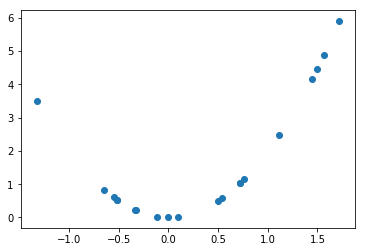

In [43]:

plt.scatter(datanp, f(datanp))
plt.show()

# Challenge
- Create an `NDArray` of dimension $1 \times 1000$ and initialzie it with random uniform distribution.
- Create function $f(x) = 3x*2 + 5$
- Plot $(x,f(x))$